<h1><strong><center>CLEANING MODEL FORECAST</center></strong></h1>

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os

## **CLEANING MODEL FORECAST**

In [89]:
fili = '../DATASETS/forecast_air_quality_2020_report.xls'
df_model = pd.read_excel(fili)
df_model = df_model.rename(columns={'ZONA':'ZONE','FECHA_PRONOSTICO':'date','ESTADO_CALIDAD_AIRE':'MODEL'})
df_model = df_model[['ZONE','date','MODEL']]
df_model['ZONE'] = df_model['ZONE'].str.replace('Callao','Lima Oeste').str.replace('Lima','').str.upper()
df_model['date'] = pd.to_datetime(df_model['date'])
df_model.set_index('date',inplace=True)

## **CLEANING OBS**

In [90]:
# OBS
df_obs = pd.read_excel('../DATASETS/indice_carlos octubre.xlsx', skiprows=1, usecols = "A:D")
df_obs['date'] = pd.to_datetime(df_obs['date'], format='%m/%d/%Y')
df_obs = df_obs.melt(id_vars='date', var_name='ZONE',value_name='OBS')
df_obs = df_obs.apply(lambda x: x.replace({'SJL':'ESTE','CRB':'NORTE','CDM':'CENTRO'}) if x.name=='ZONE' else x)
df_obs['OBS'] = df_obs['OBS'].apply(lambda x: 'buena' if (x>0 and x<=12) else 'moderado' if (x>12 and x<=35.4) else \
                                    'insalubre_grupo_sensible' if (x>35.4 and x<=55.4) else 'insalubre' if (x>55.4 and x<=150.4) else \
                                    'muy_insalubre' if (x>150.4) else np.nan)
df_obs.set_index('date', inplace=True)

## **CONCATENING**

In [101]:
df_merged = pd.concat([df_model,df_obs])
df_merged['eval'] = df_merged.apply(lambda x: x['MODEL']==x['OBS'], axis=1)
df_merged['eval'] = df_merged['eval'].apply(lambda x: 'Acierto' if x==True else 'Desacierto')

In [116]:
df_merged.dropna(how='all', axis=0)

,ZONE,MODEL,OBS,eval
date,,,,
2020-02-01,OESTE,Buena,NaN,Desacierto
2020-02-01,CENTRO,Moderada,NaN,Desacierto
2020-02-01,ESTE,Moderada,NaN,Desacierto
2020-02-01,NORTE,Buena,NaN,Desacierto
2020-02-01,SUR,Moderada,NaN,Desacierto
...,...,...,...,...
2020-10-24,NORTE,NaN,moderado,Desacierto
2020-10-25,NORTE,NaN,moderado,Desacierto
2020-10-26,NORTE,NaN,moderado,Desacierto


/home/cenciso/miniconda3/envs/pangeo/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PM2.5 evaluación pronostico')

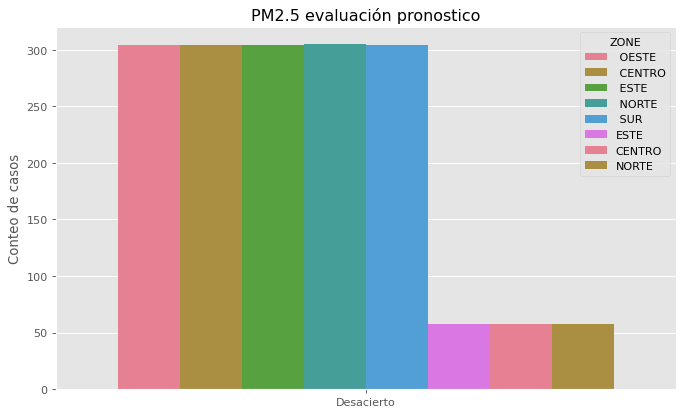

In [107]:
fig, ax = plt.subplots(figsize=(10,6), dpi=80)
sns.countplot(df_merged['eval'],ax=ax, hue=df_merged['ZONE'],palette=sns.color_palette("husl"))
ax.set_ylabel('Conteo de casos')
ax.set_xlabel('')
ax.set_title('PM2.5 evaluación pronostico')

In [84]:
type(df_model['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [85]:
type(df_obs['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [87]:
df_merged = pd.merge(df_model,df_obs,on=['date','ZONE'])

In [88]:
df_merged

,ZONE,date,MODEL,OBS


In [86]:
df_merged['eval'] = df_merged.apply(lambda x: x['MODEL']==x['OBS'], axis=1)
df_merged['eval'] = df_merged['eval'].apply(lambda x: 'Acierto' if x==True else 'Desacierto')

ValueError: Wrong number of items passed 4, placement implies 1